# Data preprocessing and Cleaning

In [1]:
import pandas as pd
import numpy as np 
# data analysis and wrangling

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab

from scipy import stats

import warnings 
warnings.filterwarnings('ignore')
# Used to supressed the warnings

In [2]:
read=r'Concrete_Data.xls'
original_data=pd.read_excel(read)


# Distribution of numerical features

In [3]:
original_data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# Describes the features of the given data

In [4]:
original_data.columns.values

array(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '], dtype=object)

- For easy manipulation of data lets use simple column names

In [5]:
# Defining new column names
new_column_names = [
    'Cement', 
    'BlastFurnaceSlag', 
    'FlyAsh', 
    'Water', 
    'Superplasticizer', 
    'CoarseAggregate', 
    'FineAggregate', 
    'Age', 
    'CompressiveStrength'
]

# Assigning new names to DataFrame
original_data.columns = new_column_names

# Describes the shape of the data

In [6]:
original_data.shape

(1030, 9)

### This table has 1030 rows with unique composition and 9 features.

# Data types of the features 

In [7]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Data Cleaning

In [8]:
original_data.isna().values.any() # To find out NaN values

False

In [9]:
original_data.isnull().values.any() # To find out Null values

False

It can be seen that ther is Null or Nan(Not a Number) values present in the data


Every feature is numerical which is continuos and hence we can proceed with interpretation of outliers

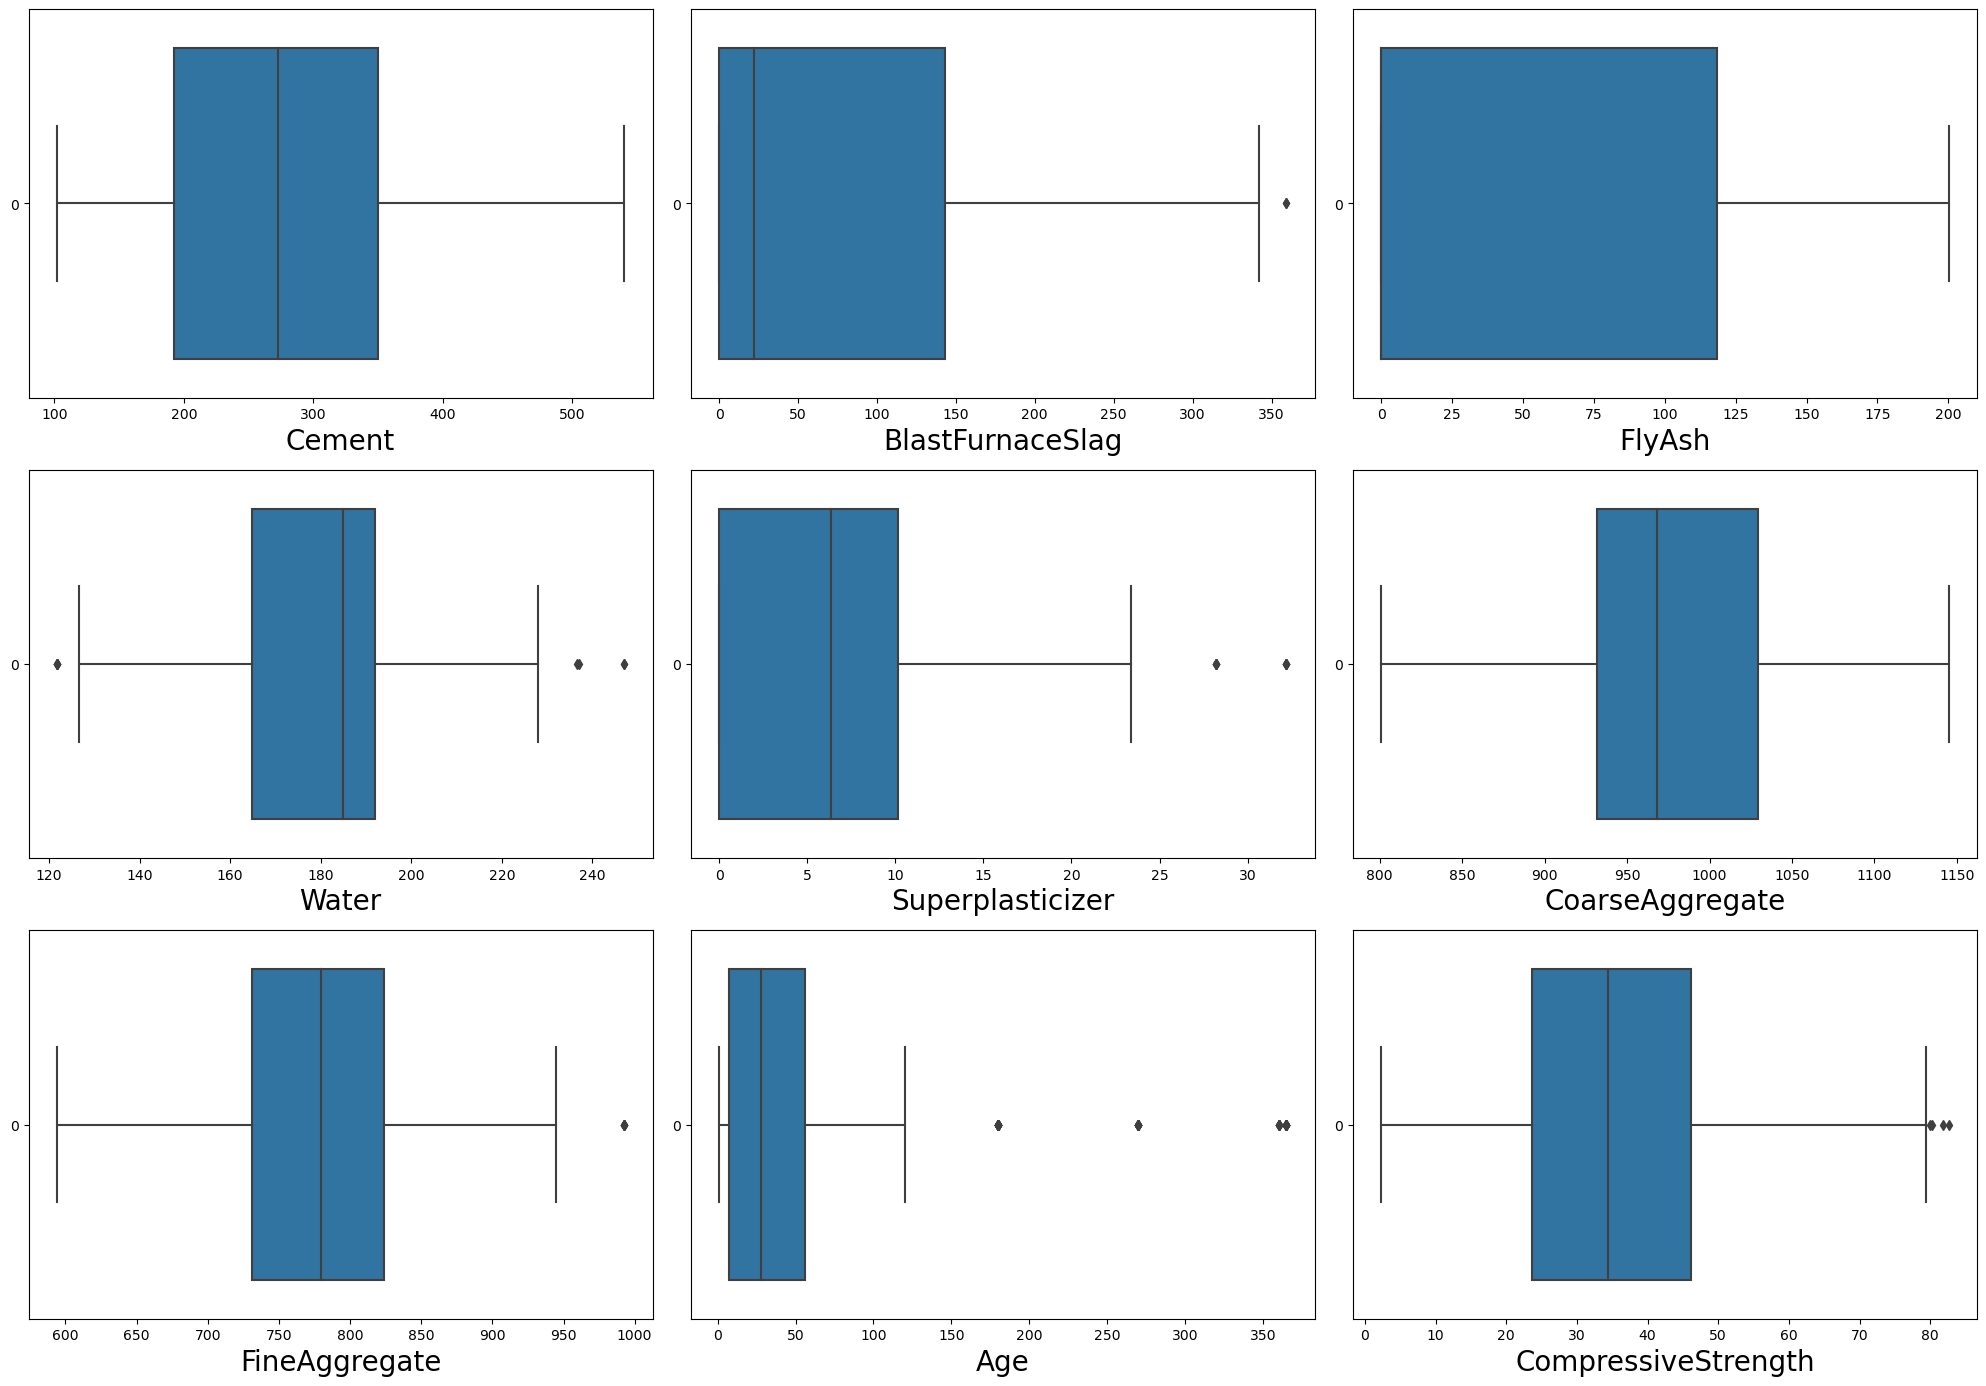

In [10]:

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in original_data.columns: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(original_data[column],orient='h') # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() 

* There ae alot of outliers present in the data which can suggest that the data is not normally distributed.

Here we are use inter quatile range to impute the outlier, becuase data is not normally distributed.

# IQR
 The IQR refers to the interquatile range, where a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean which is the difference between the first and third quartiles.

Now let us impute the ouliers based on the median values.

In [11]:
class OutlierHandler:
    def __init__(self, data):
        self.data = data
        self.original_data = data.copy()
        self.outlier_stats = None
        self.outlier_stats_before_imputation = None
        self.outlier_stats_after_imputation = None

    def calculate_outlier_stats(self, data):
        outlier_stats = {
            'Q1': [],
            'Q3': [],
            'IQR': [],
            'Lower_Bound': [],
            'Upper_Bound': [],
            'Num_Outliers': []
        }

        for col_name in data.columns[:-1]:
            Q1 = data[col_name].quantile(0.25)
            Q3 = data[col_name].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = data[(data[col_name] < lower_bound) | (data[col_name] > upper_bound)]
            n_outliers = outliers.shape[0]

            outlier_stats['Q1'].append(Q1)
            outlier_stats['Q3'].append(Q3)
            outlier_stats['IQR'].append(IQR)
            outlier_stats['Lower_Bound'].append(lower_bound)
            outlier_stats['Upper_Bound'].append(upper_bound)
            outlier_stats['Num_Outliers'].append(n_outliers)
        
        return pd.DataFrame(outlier_stats, index=data.columns[:-1])

    def impute_outliers_with_median(self):
        for col_name in self.data.columns[:-1]:
            median = self.data[col_name].median()
            self.data.loc[
                (self.data[col_name] < self.outlier_stats_before_imputation.loc[col_name, 'Lower_Bound']) | 
                (self.data[col_name] > self.outlier_stats_before_imputation.loc[col_name, 'Upper_Bound']), 
                col_name] = median

    def get_outliers_info(self):
        
        self.outlier_stats_before_imputation = self.calculate_outlier_stats(self.original_data)
        
        
        self.impute_outliers_with_median()
        
       
        self.outlier_stats_after_imputation = self.calculate_outlier_stats(self.data)
        
        
        return self.original_data, self.data, self.outlier_stats_before_imputation, self.outlier_stats_after_imputation

# Usage:
handler = OutlierHandler(original_data)
original_data, imputed_data, outlier_stats_before, outlier_stats_after = handler.get_outliers_info()


# The outliers description before imputation

In [12]:
outlier_stats_before.transpose()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
Q1,192.3750,0.000,0.000,164.90,0.00,932.0,730.950,7.0
Q3,350.0000,142.950,118.270,192.00,10.16,1029.4,824.000,56.0
IQR,157.6250,142.950,118.270,27.10,10.16,97.4,93.050,49.0
Lower_Bound,-44.0625,-214.425,-177.405,124.25,-15.24,785.9,591.375,-66.5
Upper_Bound,586.4375,357.375,295.675,232.65,25.40,1175.5,963.575,129.5
Num_Outliers,0.0000,2.000,0.000,9.00,10.00,0.0,5.000,59.0


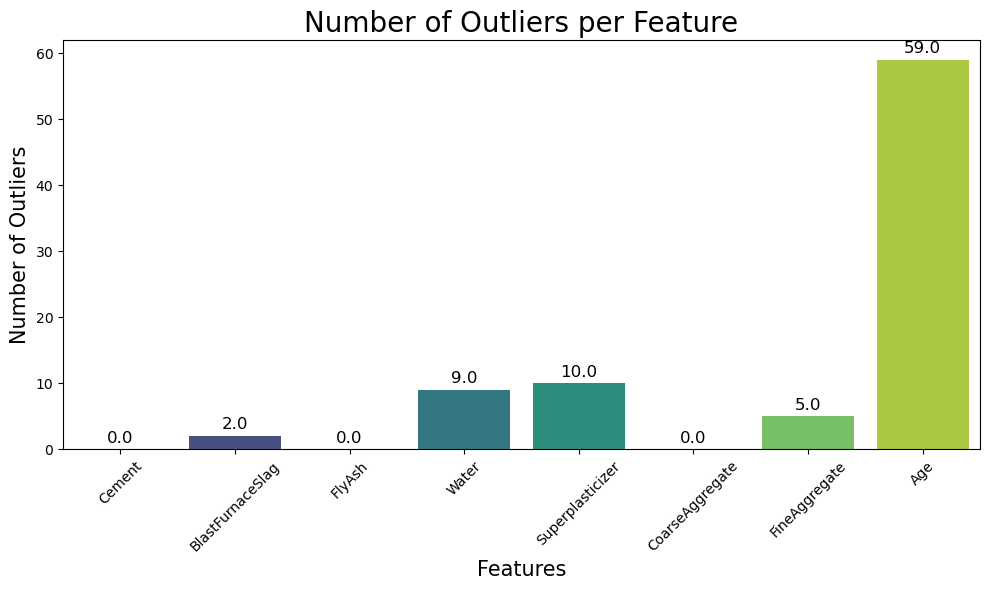

In [13]:
plt.figure(figsize=(10, 6))

barplot=sns.barplot(x=outlier_stats_before.index, y=outlier_stats_before['Num_Outliers'], palette='viridis')
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.1f'), 
                     (bar.get_x() + bar.get_width() / 2, 
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.xticks(rotation=45)
plt.title('Number of Outliers per Feature',fontsize=20)
plt.ylabel('Number of Outliers',fontsize=15)
plt.xlabel('Features',fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

# The outliers description after imputation


In [14]:
outlier_stats_after.transpose()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
Q1,192.3750,0.0000,0.000,164.90,0.0000,932.0,730.950,7.0
Q3,350.0000,142.7250,118.270,192.00,10.0750,1029.4,822.200,28.0
IQR,157.6250,142.7250,118.270,27.10,10.0750,97.4,91.250,21.0
Lower_Bound,-44.0625,-214.0875,-177.405,124.25,-15.1125,785.9,594.075,-24.5
Upper_Bound,586.4375,356.8125,295.675,232.65,25.1875,1175.5,959.075,59.5
Num_Outliers,0.0000,0.0000,0.000,0.00,0.0000,0.0,30.000,131.0


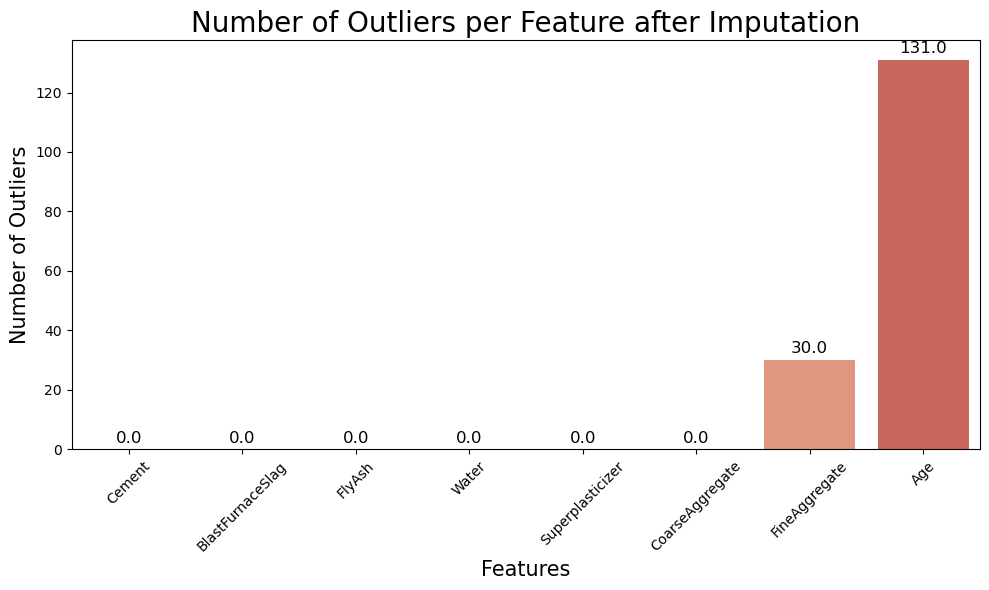

In [15]:
plt.figure(figsize=(10, 6))

barplot=sns.barplot(x=outlier_stats_after.index, y=outlier_stats_after['Num_Outliers'], palette='coolwarm')
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.1f'), 
                     (bar.get_x() + bar.get_width() / 2, 
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.xticks(rotation=45)
plt.title('Number of Outliers per Feature after Imputation',fontsize=20)
plt.ylabel('Number of Outliers',fontsize=15)
plt.xlabel('Features',fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

Even after the imputation there are some more outliers added to the values which can implemeent these outliers has to be handled using different technique , lets proceed with modeling.

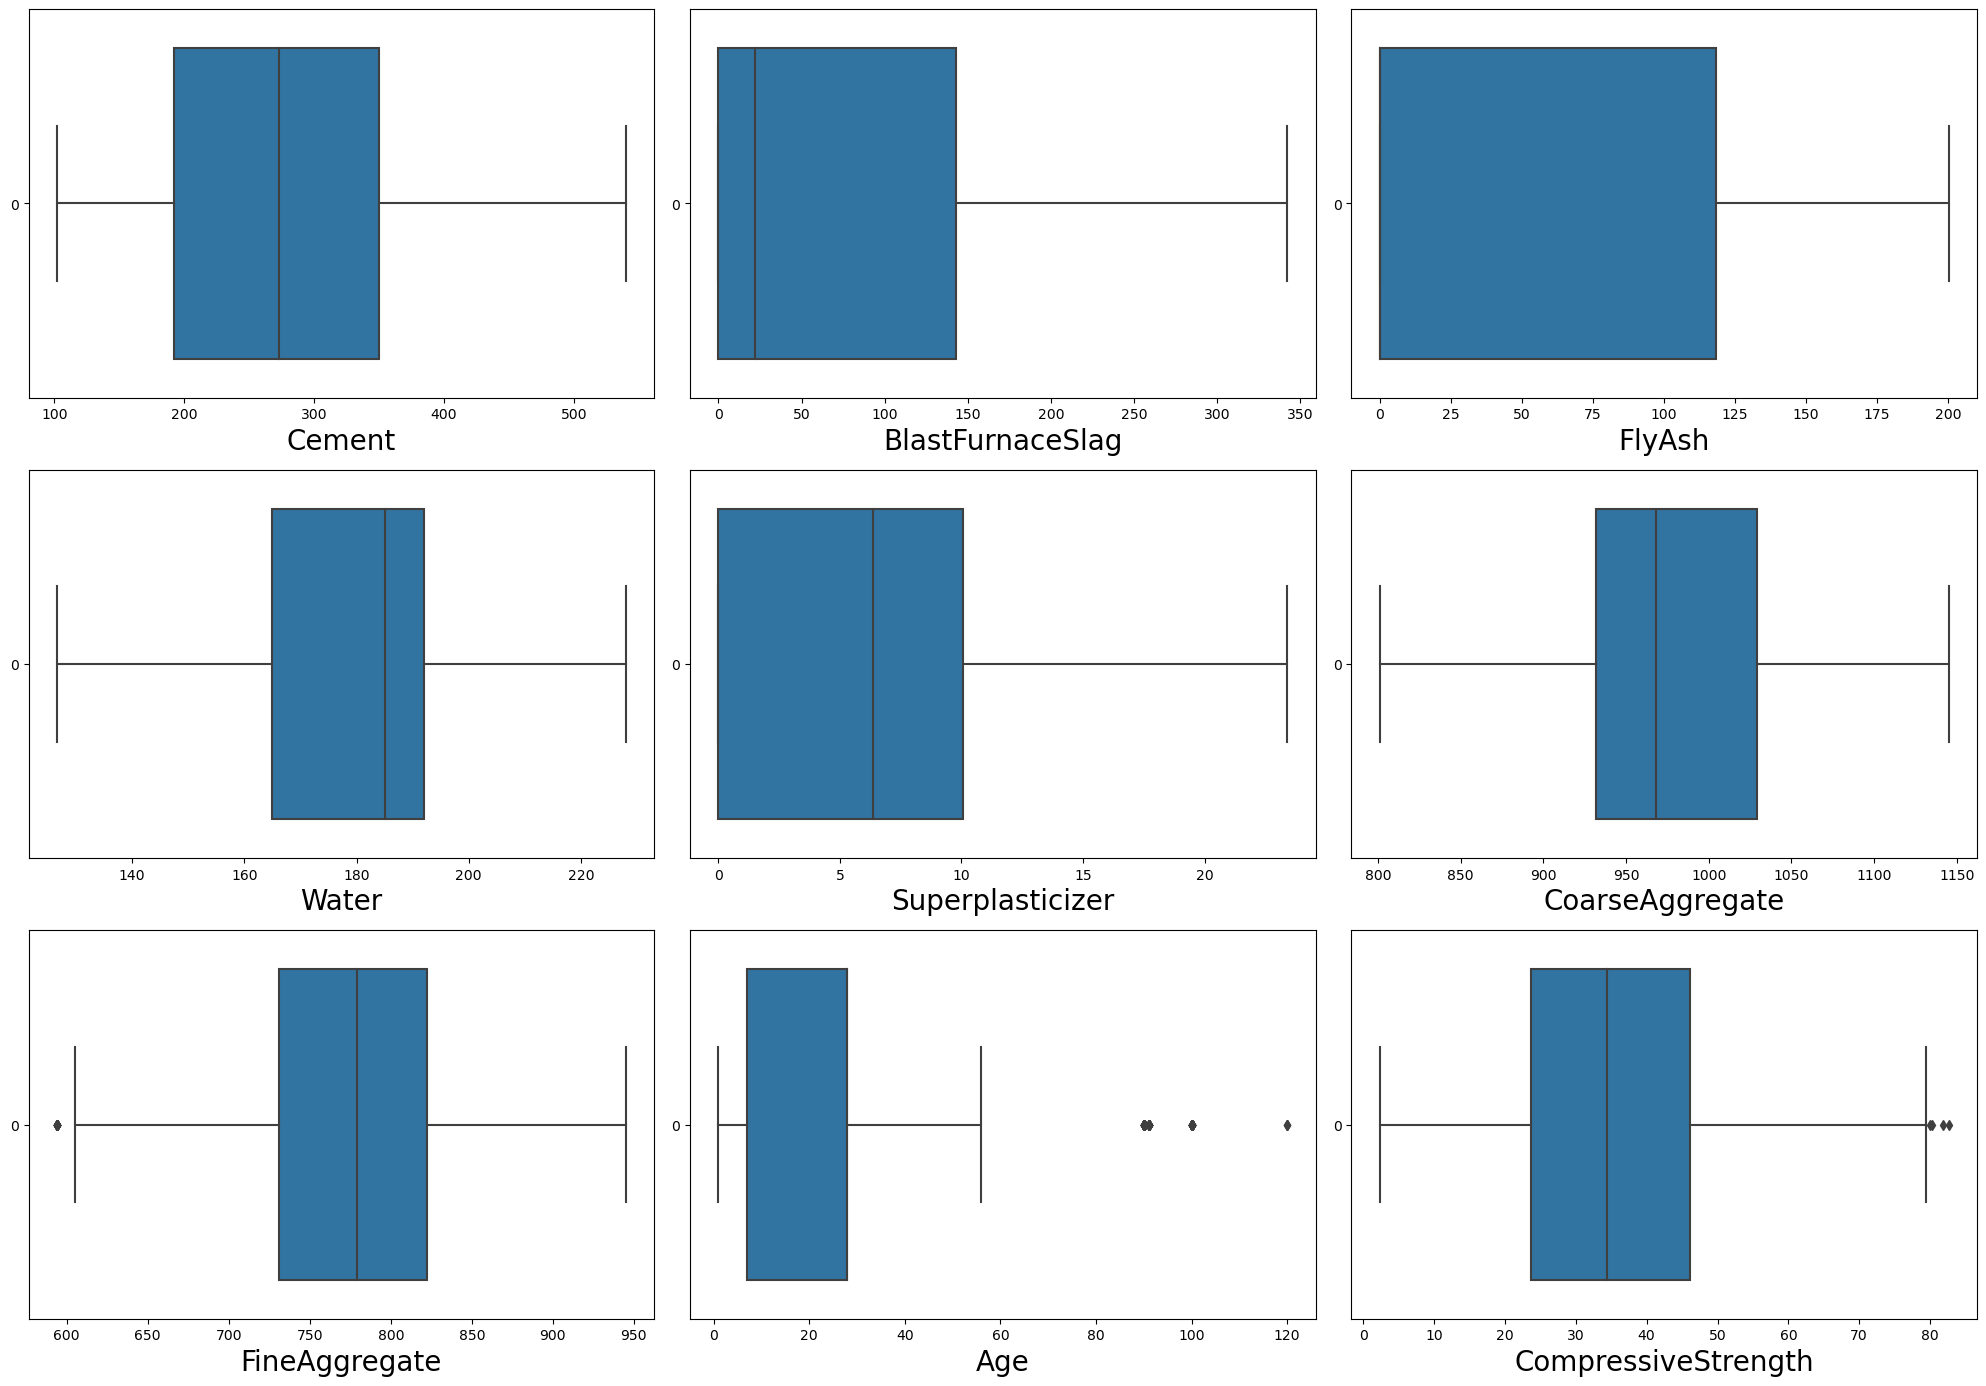

In [16]:
plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in imputed_data.columns: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(imputed_data[column],orient='h') # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() 

Let us save the imputed data into new folder and perform modeling by importing the data into next setion.

In [ ]:
try:    
    imputed_data.to_csv('Processed_data.csv', sep=',', index=False, encoding='utf-8')

except Exception as e:
    print(f"An error occurred: {e}")